# House Price Prediction 

This is a simple machine learning model created using Python, scikit-learn, and TensorFlow.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading our database!

In [23]:
df = pd.read_csv("Delhi_v2.csv")
df

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


On analyzing the data we can infer that we have a database that represents data for a house in delhi and we have to predict using all these factors what can be an approximate price of a house.

In [24]:
df.head() #first 5 rows

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [25]:
df.tail() #last 5 rows

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143
7737,7737,6500000.0,"sandal apartment, Shalimar Garden Extension 1,...",1750.0,28.693590,77.344376,3.0,2.0,3.0,Ready to Move,New Property,NaN,NaN,NaN,NaN,Flat,\n,3714.285714


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In the above prompt we can see the description of our various columns that helps us to have a better understanding of our attributes.

In [28]:
df.describe(include='all')

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
count,7738.000000,7.738000e+03,7738,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,7164,7738,2612.000000,4124,1733.000000,2759,7738,7738,7738.000000
unique,NaN,NaN,4145,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,3,NaN,2612,2,4181,NaN
top,NaN,NaN,"Raj Nagar Extension, Ghaziabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,NaN,Semi-Furnished,NaN,metro station,Flat,\n,NaN
freq,NaN,NaN,163,NaN,NaN,NaN,NaN,NaN,NaN,7148,6905,NaN,2199,NaN,8,6226,3257,NaN
mean,3868.500000,8.320635e+06,NaN,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,NaN,NaN,7.673047,NaN,1.829198,NaN,NaN,NaN,5543.660241
std,2233.912524,7.223197e+06,NaN,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,NaN,NaN,60.417508,NaN,1.192607,NaN,NaN,NaN,2408.659307
min,0.000000,1.700000e+06,NaN,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,2100.000000
25%,1934.250000,4.200000e+06,NaN,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,3950.986915
50%,3868.500000,6.000000e+06,NaN,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,4972.674332
75%,5802.750000,9.500000e+06,NaN,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,NaN,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,6350.638693


Data Cleaning!



This crucial step, known as data cleaning, involves removing null values from our dataset. These missing values can hinder the effectiveness of our model, leading to inaccurate predictions.

In [29]:
df.dropna(axis = 0, inplace=True)

In [30]:
df.isna().sum()

Unnamed: 0          0
price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
Landmarks           0
type_of_building    0
desc                0
Price_sqft          0
dtype: int64

EDA and preprocessing !

In [32]:
df["type_of_building"].unique()

array(['Flat', 'Individual House'], dtype=object)

In [33]:
df["Furnished_status"].value_counts()

Semi-Furnished    240
Unfurnished        45
Furnished          44
Name: Furnished_status, dtype: int64

In [34]:
df["neworold"].value_counts()

Resale          228
New Property    101
Name: neworold, dtype: int64

In [35]:
df["Bedrooms"].value_counts()

3.0    165
2.0    105
4.0     55
5.0      4
Name: Bedrooms, dtype: int64

In [36]:
df["Status"].value_counts()

Ready to Move    329
Name: Status, dtype: int64

In [37]:
df.mean()

C:\Users\Radhika Bajaj\AppData\Local\Temp\ipykernel_4256\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Unnamed: 0    3.836805e+03
price         1.118188e+07
area          1.524553e+03
latitude      2.855783e+01
longitude     7.722580e+01
Bedrooms      2.872340e+00
Bathrooms     2.629179e+00
Balcony       2.030395e+00
parking       2.635258e+00
Lift          1.182371e+00
Price_sqft    6.701044e+03
dtype: float64

Graphical Representation!!

<Axes: >

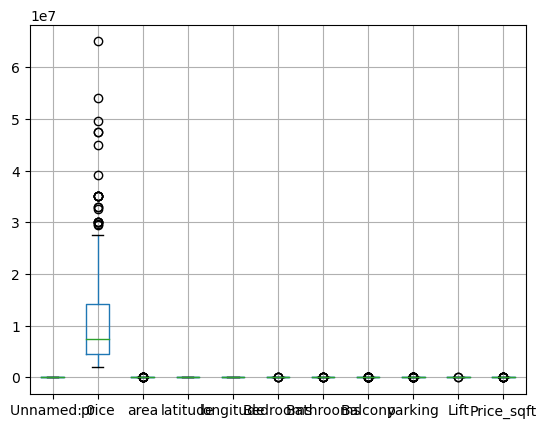

In [38]:
df.boxplot()

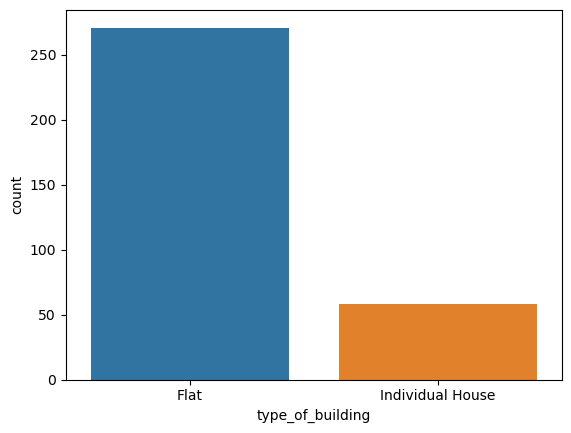

In [39]:
sns.countplot(data=df,x='type_of_building')
plt.show()

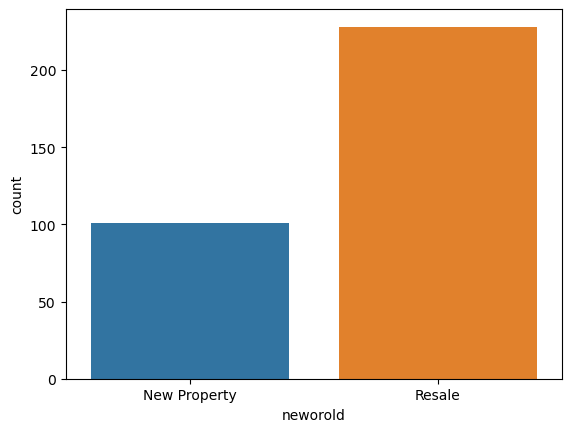

In [40]:
sns.countplot(data=df,x='neworold')
plt.show()

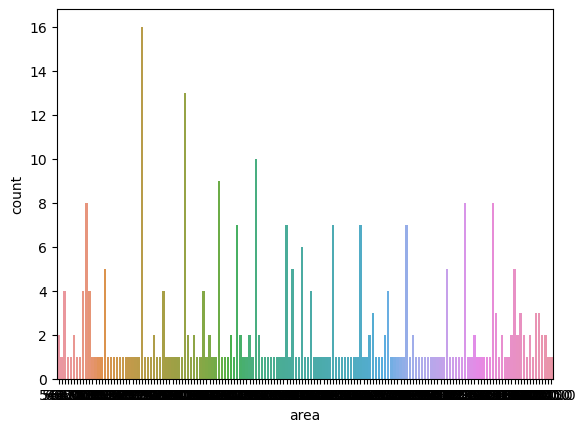

In [41]:
sns.countplot(data=df,x='area')
plt.show()

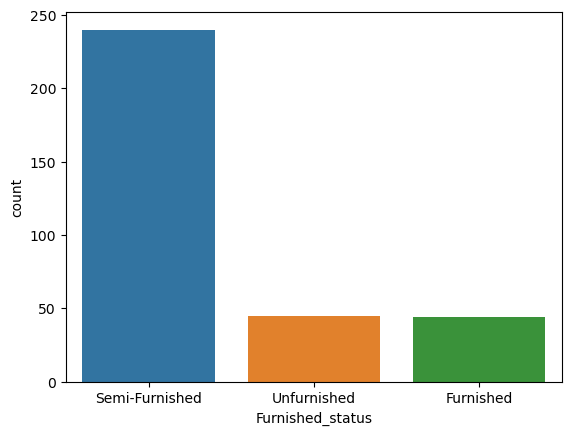

In [42]:
sns.countplot(data=df,x='Furnished_status')
plt.show()

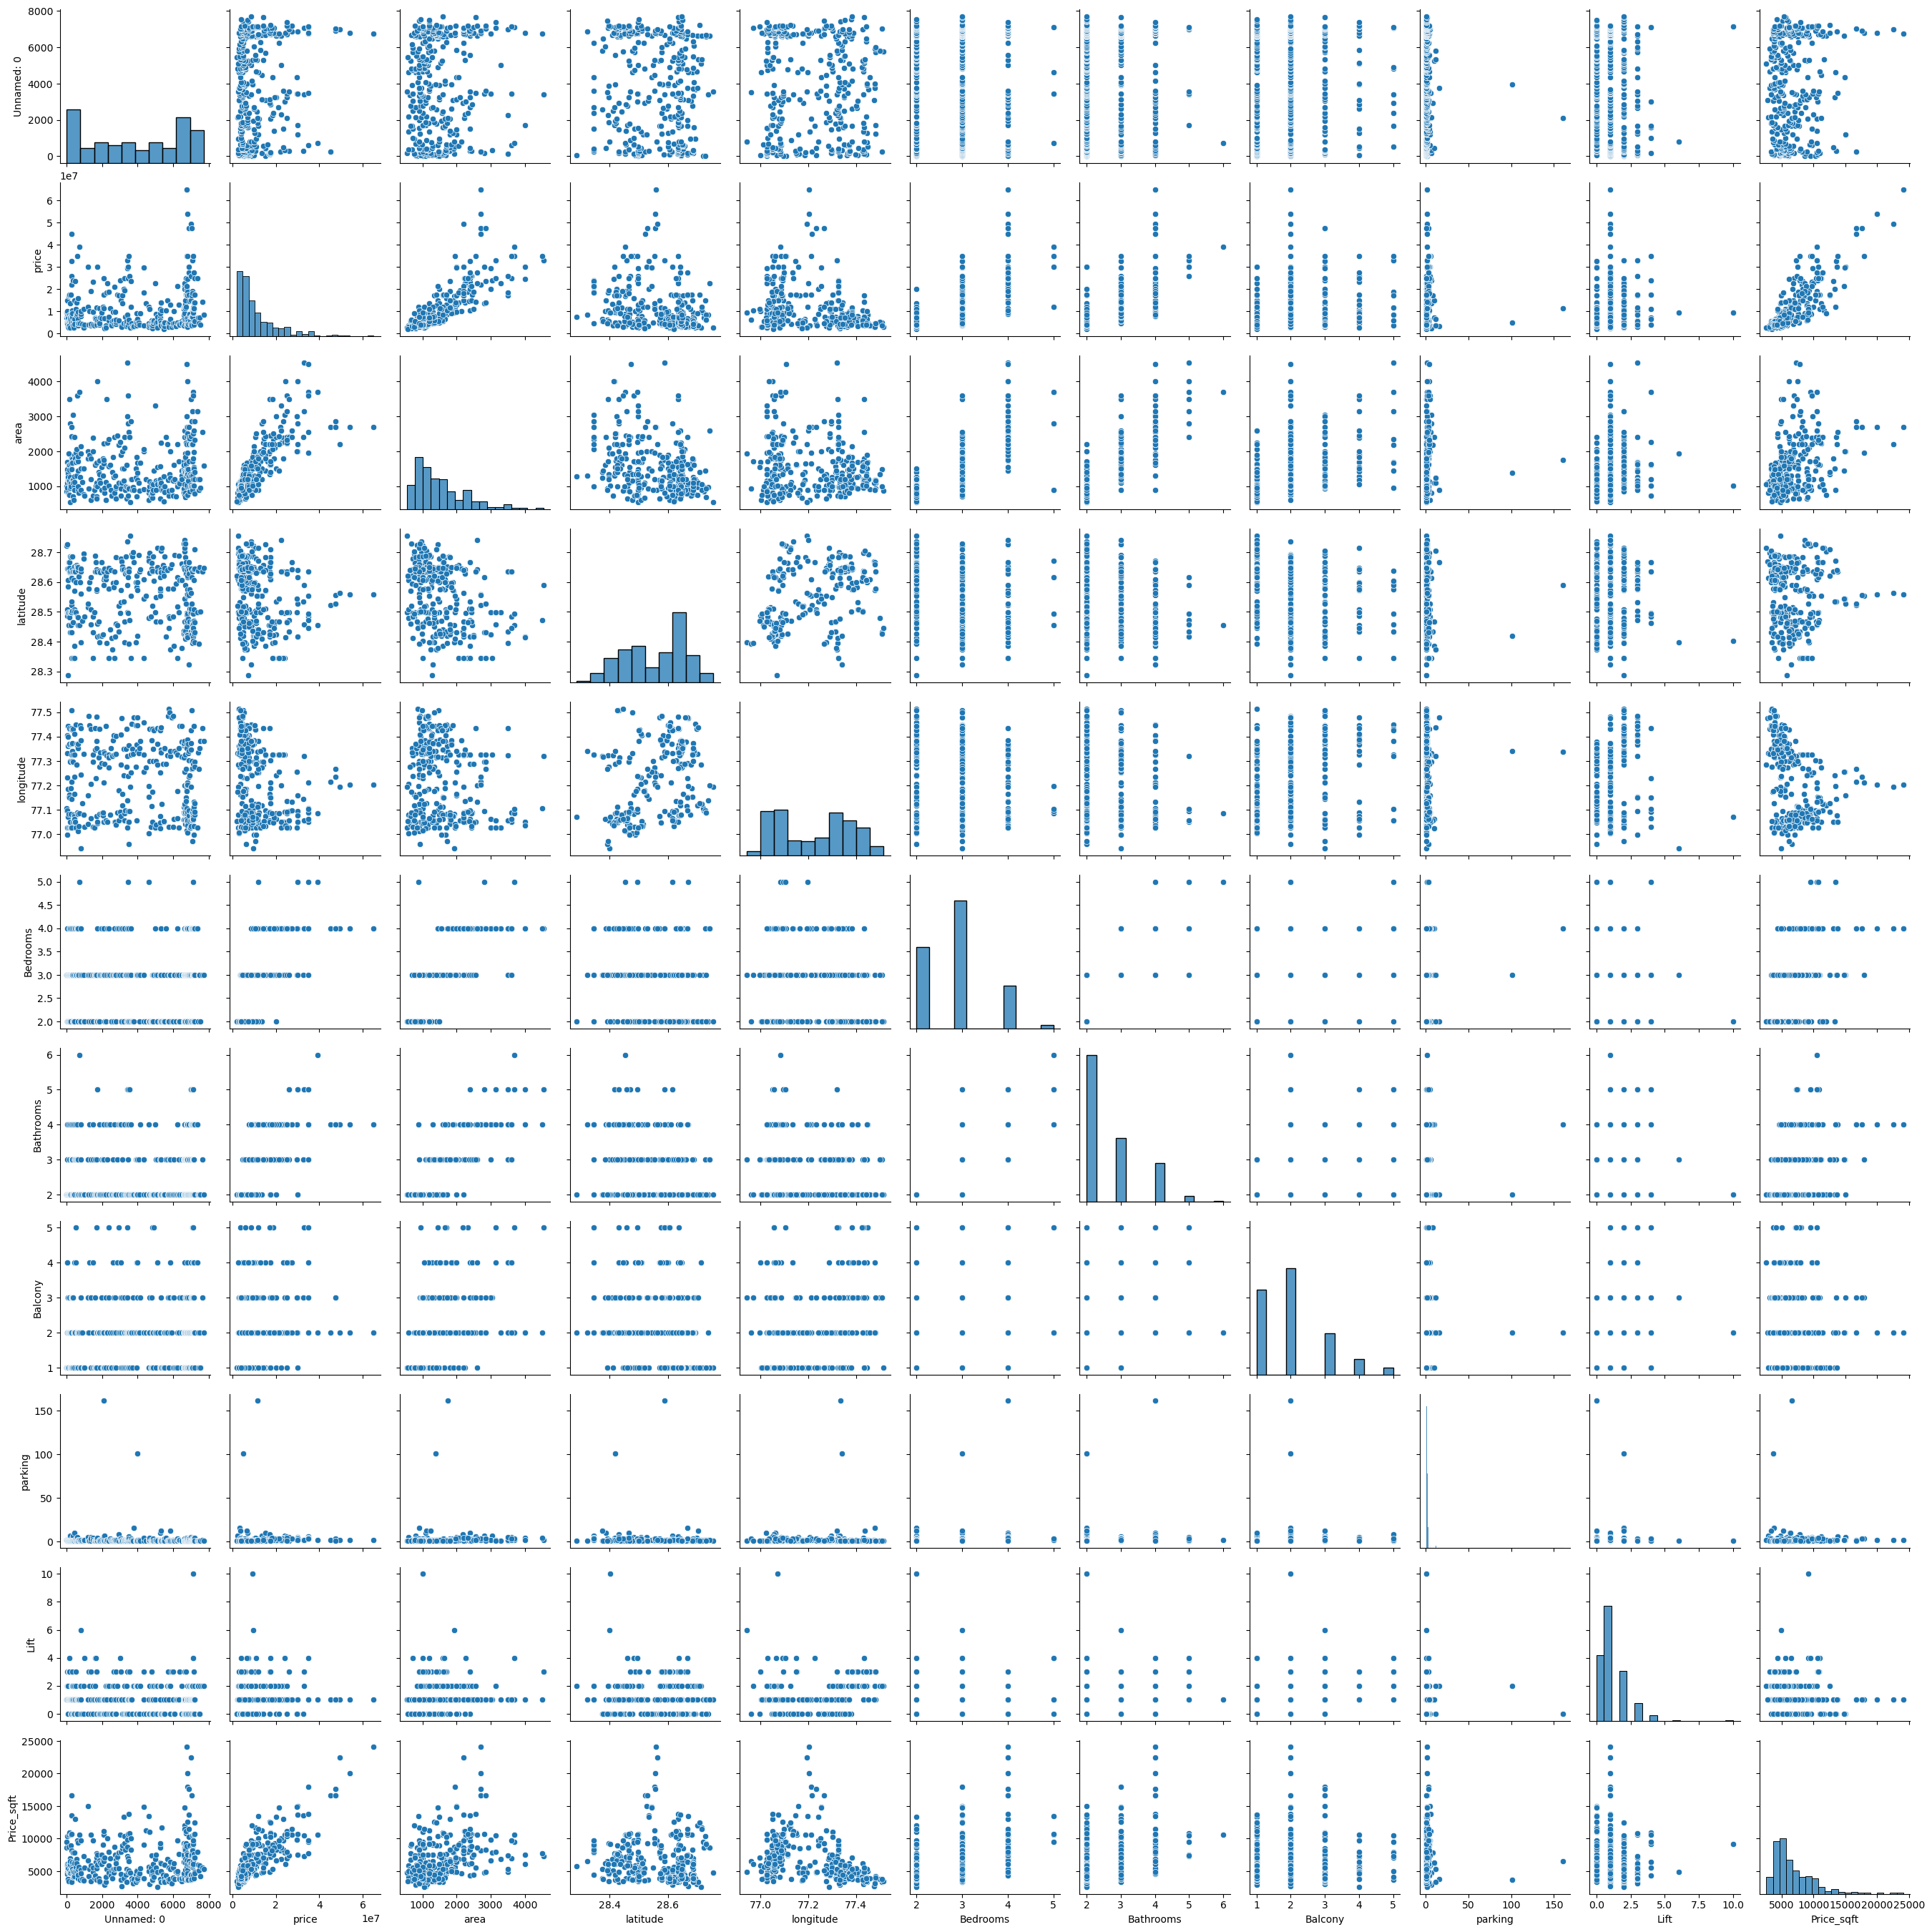

In [43]:
sns.pairplot(df)
plt.show()

In [45]:
df.corr()

C:\Users\Radhika Bajaj\AppData\Local\Temp\ipykernel_4256\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
Unnamed: 0,1.000000,0.124021,0.079490,-0.066885,-0.063712,0.032383,0.075183,0.030277,-0.029800,-0.048068,0.123308
price,0.124021,1.000000,0.799415,-0.208900,-0.287835,0.664896,0.725292,0.259667,0.017889,0.016055,0.836778
area,0.079490,0.799415,1.000000,-0.325629,-0.159741,0.748883,0.816067,0.424410,0.047274,0.119573,0.406353
latitude,-0.066885,-0.208900,-0.325629,1.000000,0.319478,-0.225169,-0.351782,-0.202685,-0.047388,-0.050224,-0.050347
longitude,-0.063712,-0.287835,-0.159741,0.319478,1.000000,-0.224960,-0.188005,0.181583,0.046509,0.158732,-0.374320
Bedrooms,0.032383,0.664896,0.748883,-0.225169,-0.224960,1.000000,0.747980,0.273493,0.106951,-0.020465,0.427440
Bathrooms,0.075183,0.725292,0.816067,-0.351782,-0.188005,0.747980,1.000000,0.405071,0.089822,0.079910,0.444812
Balcony,0.030277,0.259667,0.424410,-0.202685,0.181583,0.273493,0.405071,1.000000,0.015152,0.395586,0.028445
parking,-0.029800,0.017889,0.047274,-0.047388,0.046509,0.106951,0.089822,0.015152,1.000000,-0.030945,-0.009813
Lift,-0.048068,0.016055,0.119573,-0.050224,0.158732,-0.020465,0.079910,0.395586,-0.030945,1.000000,-0.092832


C:\Users\Radhika Bajaj\AppData\Local\Temp\ipykernel_4256\2975651719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


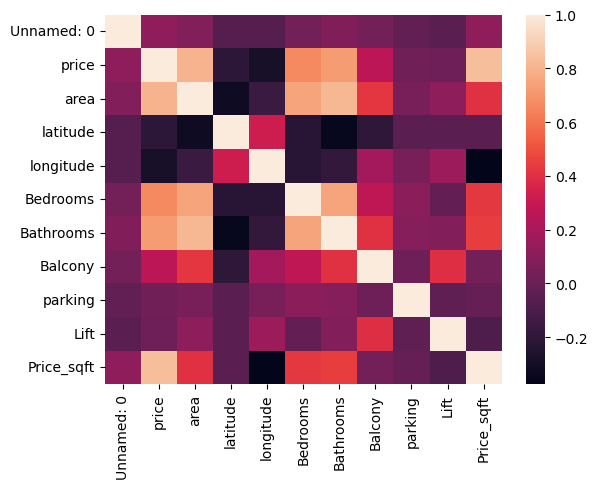

In [46]:
sns.heatmap(df.corr())
plt.show()

Label encoding our values to make prediction easier and more accurate.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
cat_cols = []
for column in df.columns:
    # Check if the data type of the column is not integer
    if df[column].dtype != 'int64':
        cat_cols.append(column)
for cols in cat_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 10 to 7709
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        329 non-null    int64
 1   price             329 non-null    int64
 2   Address           329 non-null    int32
 3   area              329 non-null    int64
 4   latitude          329 non-null    int64
 5   longitude         329 non-null    int64
 6   Bedrooms          329 non-null    int64
 7   Bathrooms         329 non-null    int64
 8   Balcony           329 non-null    int64
 9   Status            329 non-null    int32
 10  neworold          329 non-null    int32
 11  parking           329 non-null    int64
 12  Furnished_status  329 non-null    int32
 13  Lift              329 non-null    int64
 14  Landmarks         329 non-null    int32
 15  type_of_building  329 non-null    int32
 16  desc              329 non-null    int32
 17  Price_sqft        329 non-null   

We now have uniform datatype of all our attributes

Perdictions!!

We will be using linear regressions model to achieve the task.

Linear Regression

In [15]:
X = df.drop(columns=['price'])
y = df["price"]

Splitting our data into test and train to evaluate our models!

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(y_test, y_pred)

3.6271359599110746

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, force_finite=False)

0.985967102001461

In our conclusion, we can say that we have crerated an effective machine learning model to make accurate predictions about the house price in Delhi. 